[STEP] Loading dataset from: C:\Users\Admin\OneDrive\Data_ML\stroke.csv
[INFO] Shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


[INFO] Class distribution (0=no stroke, 1=stroke):
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64
[SPLIT] Train: (4088, 10), Test: (1022, 10)
[INFO] #Numeric: 5 | #Categorical: 5

[TRAIN] Logistic Regression (baseline, ML) ...

=== LogReg (baseline, ML) — Test Set ===
Accuracy : 0.7466
Precision: 0.1384
Recall   : 0.8000
F1-score : 0.2360
ROC AUC  : 0.8425

Classification Report:
              precision    recall  f1-score   support

           0     0.9864    0.7438    0.8481       972
           1     0.1384    0.8000    0.2360        50

    accuracy                         0.7466      1022
   macro avg     0.5624    0.7719    0.5420      1022
weighted avg     0.9449    0.7466    0.8181      1022



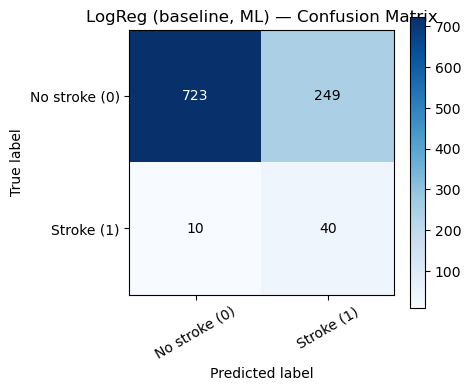

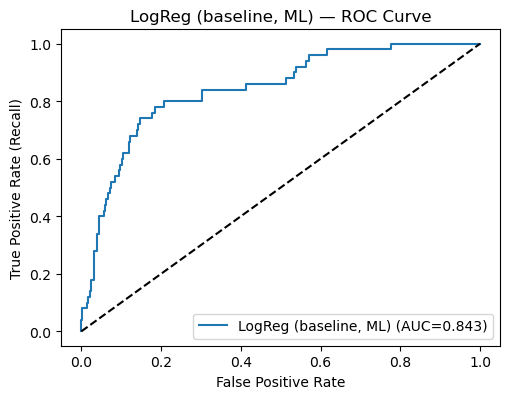

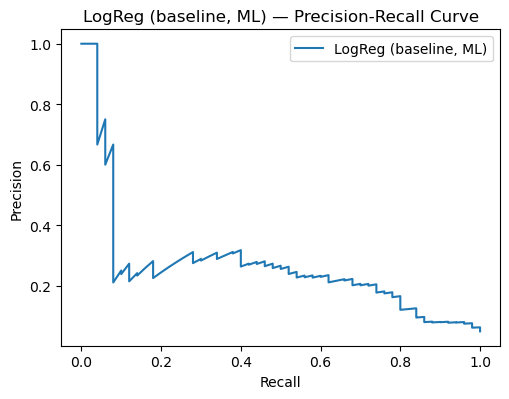


[TUNE] Logistic Regression (GridSearchCV, scoring=F1) ...
[BEST PARAMS] LR -> {'clf__C': 0.1}

=== LogReg (tuned, ML) — Test Set ===
Accuracy : 0.7456
Precision: 0.1379
Recall   : 0.8000
F1-score : 0.2353
ROC AUC  : 0.8412

Classification Report:
              precision    recall  f1-score   support

           0     0.9863    0.7428    0.8474       972
           1     0.1379    0.8000    0.2353        50

    accuracy                         0.7456      1022
   macro avg     0.5621    0.7714    0.5414      1022
weighted avg     0.9448    0.7456    0.8175      1022



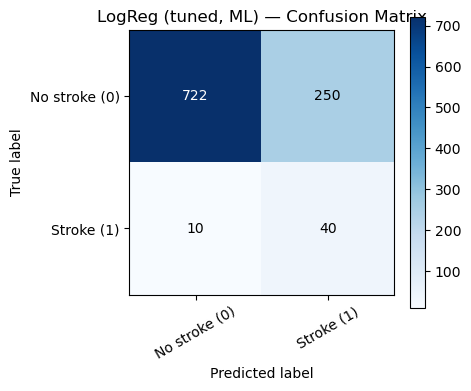

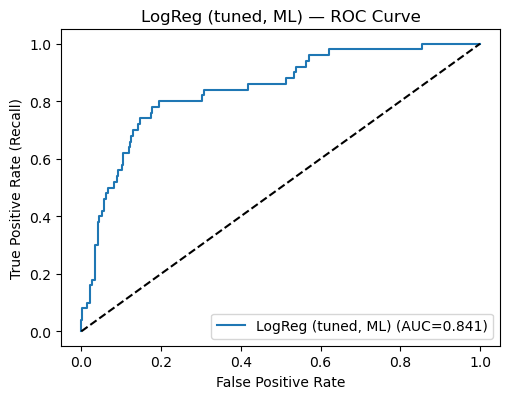

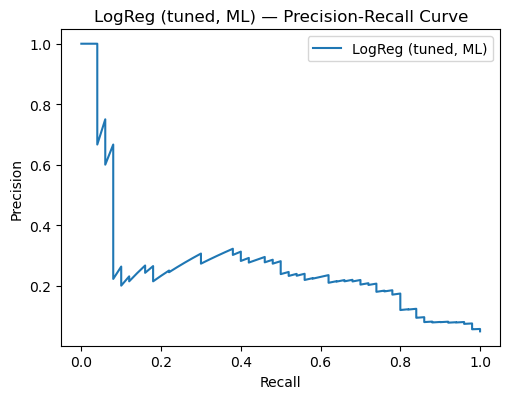

[INFO] Class weights for DL: {0: 0.5255849832861919, 1: 10.271356783919598}

[DL] Training Neural Network (ANN) ...
Epoch 1/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6276 - auc: 0.7521 - loss: 0.6126 - val_accuracy: 0.7359 - val_auc: 0.8337 - val_loss: 0.5559
Epoch 2/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7124 - auc: 0.8284 - loss: 0.5163 - val_accuracy: 0.7457 - val_auc: 0.8599 - val_loss: 0.5038
Epoch 3/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7195 - auc: 0.8338 - loss: 0.4939 - val_accuracy: 0.7262 - val_auc: 0.8738 - val_loss: 0.5130
Epoch 4/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7124 - auc: 0.8403 - loss: 0.4813 - val_accuracy: 0.7286 - val_auc: 0.8773 - val_loss: 0.4953
Epoch 5/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7105 - auc: 0.8436 - loss: 0.4716 - val_accuracy: 0.7433 - val_auc: 0.8802 - val_loss: 0.4747
Epoch 6/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - auc: 0.8460 - loss: 0.

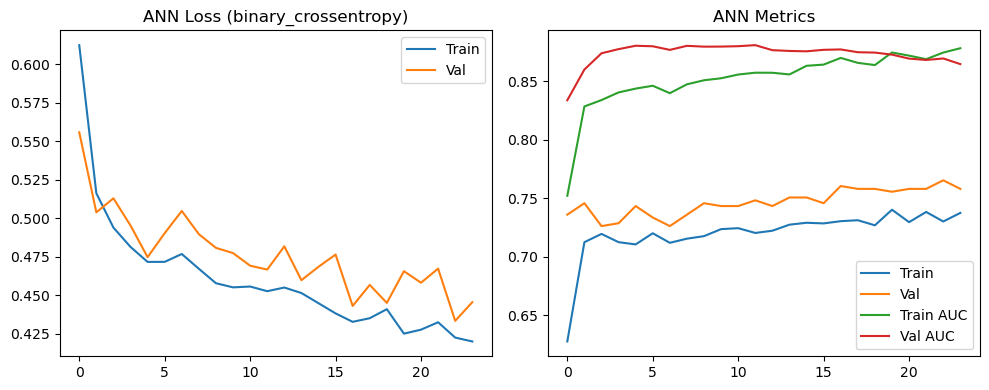

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Neural Network (DL) — Test Set ===
Accuracy : 0.7055
Precision: 0.1208
Recall   : 0.8000
F1-score : 0.2100
ROC AUC  : 0.8372

Classification Report:
              precision    recall  f1-score   support

           0     0.9855    0.7006    0.8190       972
           1     0.1208    0.8000    0.2100        50

    accuracy                         0.7055      1022
   macro avg     0.5532    0.7503    0.5145      1022
weighted avg     0.9432    0.7055    0.7892      1022



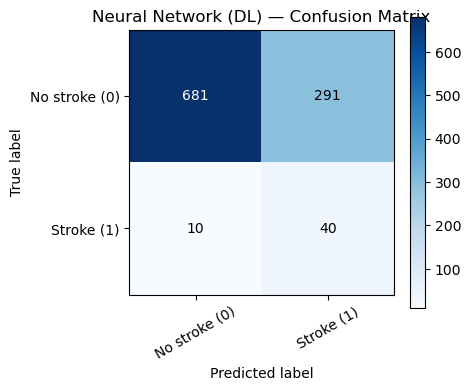

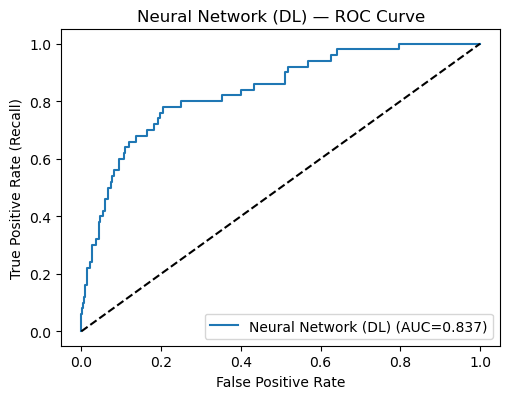

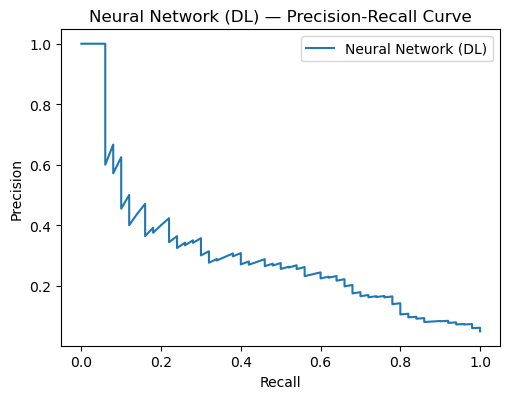

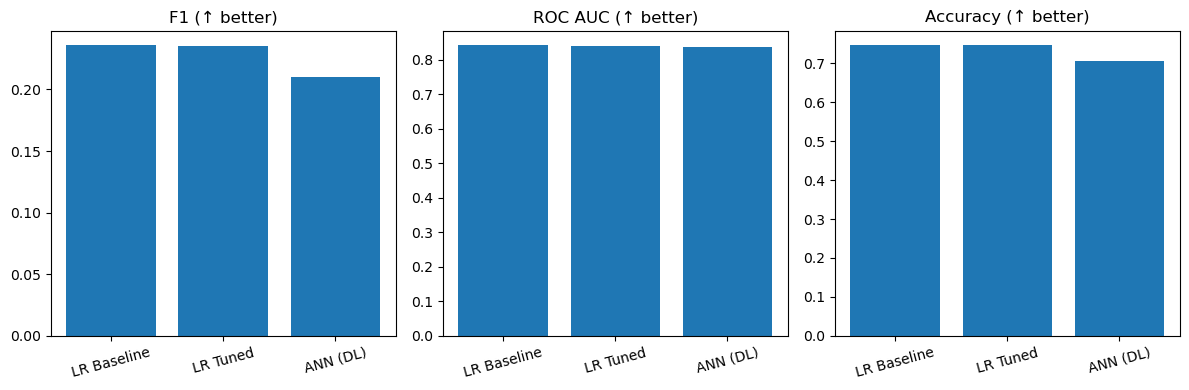


✅ FINAL COMPARISON (higher is better for all):
LogReg Baseline (ML):  ACC=0.747, PREC=0.138, REC=0.800, F1=0.236, AUC=0.843
LogReg Tuned   (ML):  ACC=0.746, PREC=0.138, REC=0.800, F1=0.235, AUC=0.841
Neural Net     (DL):  ACC=0.705, PREC=0.121, REC=0.800, F1=0.210, AUC=0.837


In [10]:
# ============================================================
# Stroke Prediction (Kaggle)
# Machine Learning: Logistic Regression (+ GridSearchCV)
# Deep Learning: Keras ANN (class weights for imbalance)
# ============================================================

# -------------------------
# 0. IMPORTS & SETUP
# -------------------------
import warnings
warnings.filterwarnings("ignore")  # keep outputs clean

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, classification_report
)
from sklearn.utils.class_weight import compute_class_weight

# -------------------------
# 1. LOAD DATASET (Either Online from OpenML or Local CSV)
# -------------------------
local_path = r"C:\Users\Admin\OneDrive\Data_ML\stroke.csv"

if not os.path.exists(local_path):
    raise FileNotFoundError(
        f"File not found:\n  {local_path}\n"
        "Please save the Kaggle 'Stroke Prediction Dataset' there (CSV or XLSX), or update 'local_path'."
    )

print("[STEP] Loading dataset from:", local_path)
if local_path.lower().endswith(".xlsx"):
    df = pd.read_excel(local_path)
else:
    df = pd.read_csv(local_path)

print("[INFO] Shape:", df.shape)
display(df.head())

# ---------------------------------------------------------
# 2️. DATA CLEANING
#    - Drop obvious non-feature 'id'
#    - Target must be 'stroke' (0/1)
#    - Replace "Unknown"/"?" with NaN for consistent imputation
# ---------------------------------------------------------
if "id" in df.columns:
    df = df.drop(columns=["id"])

if "stroke" not in df.columns:
    raise ValueError("Expected a 'stroke' column (0/1). Please check your file.")

# Standardize unknown markers to NaN
df = df.replace({"?": np.nan, "Unknown": np.nan})

# y = labels (0/1); X = features
y = df["stroke"].astype(int)
X = df.drop(columns=["stroke"])

print("[INFO] Class distribution (0=no stroke, 1=stroke):")
print(y.value_counts(normalize=True).rename("proportion"))

# ---------------------------------------------------------
# 3. Train/Test split (80/20) with stratification (very important for imbalance)
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"[SPLIT] Train: {X_train.shape}, Test: {X_test.shape}")

# ---------------------------------------------------------
# 4. PREPROCESSING (Numeric + Categorical)
#    - Numeric: median impute + StandardScaler
#    - Categorical: most_frequent impute + OneHotEncoder (ignore unknowns)
# ---------------------------------------------------------
# Heuristic typing: anything numeric → numeric; others → categorical
numeric_cols = [c for c in X_train.columns if pd.api.types.is_numeric_dtype(X_train[c])]
categorical_cols = [c for c in X_train.columns if not pd.api.types.is_numeric_dtype(X_train[c])]

print(f"[INFO] #Numeric: {len(numeric_cols)} | #Categorical: {len(categorical_cols)}")
# Common columns in this dataset:
#   numeric: age, avg_glucose_level, bmi, hypertension (0/1), heart_disease (0/1)
#   categorical: gender, ever_married, work_type, Residence_type, smoking_status

num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),  # fill missing numeric (e.g., bmi)
    ("scaler", StandardScaler()),
])

# OneHotEncoder API compatibility
try:
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True)),
    ])
except TypeError:
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse=True)),
    ])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, numeric_cols),
        ("cat", cat_pipe, categorical_cols),
    ],
    remainder="drop"
)

# ---------------------------------------------------------
# 5. MACHINE LEARNING MODEL — LOGISTIC REGRESSION (baseline)
# class_weight='balanced' helps with severe class imbalance (~5% stroke=1)
# ---------------------------------------------------------
logreg_base = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", LogisticRegression(max_iter=600, solver="liblinear", class_weight="balanced"))
])

print("\n[TRAIN] Logistic Regression (baseline, ML) ...")
logreg_base.fit(X_train, y_train)

# Predict proba & labels (default threshold 0.5)
y_proba_lr = logreg_base.predict_proba(X_test)[:, 1]
y_pred_lr  = (y_proba_lr >= 0.5).astype(int)

# ---------------------------------------------------------
# 6. Evaluation helper + plots (CM, ROC, PR)
# ---------------------------------------------------------
def evaluate_cls(y_true, y_pred, y_proba, name="Model", pos_label_name="Stroke=1"):
    """
    Prints Accuracy, Precision, Recall, F1, ROC-AUC, and draws:
      - Confusion Matrix
      - ROC Curve
      - Precision-Recall Curve
    """
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1  = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_proba)

    print(f"\n=== {name} — Test Set ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4.8,4.1))
    plt.imshow(cm, cmap="Blues", interpolation="nearest")
    plt.title(f"{name} — Confusion Matrix")
    plt.colorbar()
    ticks = np.arange(2)
    plt.xticks(ticks, ["No stroke (0)", "Stroke (1)"], rotation=30)
    plt.yticks(ticks, ["No stroke (0)", "Stroke (1)"])
    thresh = cm.max() / 2
    for i in range(2):
        for j in range(2):
            plt.text(j, i, format(cm[i, j], "d"),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label"); plt.xlabel("Predicted label")
    plt.tight_layout(); plt.show()

    # ROC
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(5.2,4.1))
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    plt.plot([0,1], [0,1], "k--")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate (Recall)")
    plt.title(f"{name} — ROC Curve"); plt.legend(loc="lower right")
    plt.tight_layout(); plt.show()

    # Precision-Recall
    prec, recs, _ = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(5.2,4.1))
    plt.plot(recs, prec, label=name)
    plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.title(f"{name} — Precision-Recall Curve"); plt.legend()
    plt.tight_layout(); plt.show()

    return {"ACC": acc, "PREC": pre, "REC": rec, "F1": f1, "AUC": auc}

lr_base_scores = evaluate_cls(y_test, y_pred_lr, y_proba_lr, "LogReg (baseline, ML)")

# ---------------------------------------------------------
# 7. HYPERPARAMETER TUNING (GridSearchCV) — tune 'C'
# Smaller C = stronger regularization (simpler model).
# Optimize F1 to balance precision/recall (important in medical screening).
# ---------------------------------------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=42)

logreg_pipe = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", LogisticRegression(max_iter=800, solver="liblinear", class_weight="balanced"))
])

lr_grid = {"clf__C": [0.1, 0.5, 1.0, 2.0, 5.0]}

print("\n[TUNE] Logistic Regression (GridSearchCV, scoring=F1) ...")
lr_gs = GridSearchCV(
    estimator=logreg_pipe,
    param_grid=lr_grid,
    scoring="f1",
    cv=cv,
    n_jobs=-1
)
lr_gs.fit(X_train, y_train)
print("[BEST PARAMS] LR ->", lr_gs.best_params_)

lr_best = lr_gs.best_estimator_
y_proba_lr_tuned = lr_best.predict_proba(X_test)[:, 1]
y_pred_lr_tuned  = (y_proba_lr_tuned >= 0.5).astype(int)
lr_tuned_scores  = evaluate_cls(y_test, y_pred_lr_tuned, y_proba_lr_tuned, "LogReg (tuned, ML)")

# ---------------------------------------------------------
# 8. DEEP LEARNING — Keras ANN (same preprocessed features)
# Convert sparse -> dense for Keras
# Use class weights (severe imbalance)
# ---------------------------------------------------------
# Fit preprocess separately to produce arrays for DL (avoid leakage)
X_train_pre = preprocess.fit_transform(X_train)
X_test_pre  = preprocess.transform(X_test)

# OneHotEncoder output is sparse → convert to dense arrays for TF/Keras
if hasattr(X_train_pre, "toarray"):
    X_train_pre = X_train_pre.toarray()
if hasattr(X_test_pre, "toarray"):
    X_test_pre = X_test_pre.toarray()

# Compute class weights so the minority class gets a higher weight
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = {int(c): float(w) for c, w in zip(classes, cw)}
print("[INFO] Class weights for DL:", class_weight_dict)

# Build and train the ANN
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
except Exception as e:
    raise SystemExit(
        "\n[ERROR] TensorFlow not installed in this kernel.\n"
        "Run:  !pip install tensorflow\n"
        "Then: Kernel → Restart Kernel\n"
        f"Details: {e}"
    )

tf.keras.utils.set_random_seed(42)

model = keras.Sequential([
    layers.Input(shape=(X_train_pre.shape[1],)),  # input size = # preprocessed features
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),                          # a bit more dropout due to imbalance
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")         # sigmoid outputs probability of class 1
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", keras.metrics.AUC(name="auc")]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_auc", mode="max", patience=12, restore_best_weights=True
)

print("\n[DL] Training Neural Network (ANN) ...")
history = model.fit(
    X_train_pre, y_train,
    validation_split=0.1,   # 10% of train used for validation monitoring
    epochs=80,              # max; early stopping will likely stop earlier
    batch_size=128,
    verbose=1,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

# Training curves (loss & metrics)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("ANN Loss (binary_crossentropy)"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
if "auc" in history.history and "val_auc" in history.history:
    plt.plot(history.history["auc"], label="Train AUC")
    plt.plot(history.history["val_auc"], label="Val AUC")
plt.title("ANN Metrics"); plt.legend()
plt.tight_layout(); plt.show()

# Evaluate ANN on test
y_proba_dl = model.predict(X_test_pre).ravel()
y_pred_dl  = (y_proba_dl >= 0.5).astype(int)
dl_scores  = evaluate_cls(y_test, y_pred_dl, y_proba_dl, "Neural Network (DL)")

# ---------------------------------------------------------
# 9. COMPARE ML vs DL
# ---------------------------------------------------------
labels = ["LR Baseline", "LR Tuned", "ANN (DL)"]
accs = [lr_base_scores["ACC"], lr_tuned_scores["ACC"],  dl_scores["ACC"]]
prec = [lr_base_scores["PREC"], lr_tuned_scores["PREC"], dl_scores["PREC"]]
rec  = [lr_base_scores["REC"],  lr_tuned_scores["REC"],  dl_scores["REC"]]
f1s  = [lr_base_scores["F1"],   lr_tuned_scores["F1"],   dl_scores["F1"]]
aucs = [lr_base_scores["AUC"],  lr_tuned_scores["AUC"],  dl_scores["AUC"]]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.bar(labels, f1s);  plt.title("F1 (↑ better)");   plt.xticks(rotation=15)
plt.subplot(1,3,2); plt.bar(labels, aucs); plt.title("ROC AUC (↑ better)"); plt.xticks(rotation=15)
plt.subplot(1,3,3); plt.bar(labels, accs); plt.title("Accuracy (↑ better)"); plt.xticks(rotation=15)
plt.tight_layout(); plt.show()

print("\n✅ FINAL COMPARISON (higher is better for all):")
print(f"LogReg Baseline (ML):  ACC={accs[0]:.3f}, PREC={prec[0]:.3f}, REC={rec[0]:.3f}, F1={f1s[0]:.3f}, AUC={aucs[0]:.3f}")
print(f"LogReg Tuned   (ML):  ACC={accs[1]:.3f}, PREC={prec[1]:.3f}, REC={rec[1]:.3f}, F1={f1s[1]:.3f}, AUC={aucs[1]:.3f}")
print(f"Neural Net     (DL):  ACC={accs[2]:.3f}, PREC={prec[2]:.3f}, REC={rec[2]:.3f}, F1={f1s[2]:.3f}, AUC={aucs[2]:.3f}")
